In [1]:
!pip install -U seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

/var/folders/pm/nz91x7pd21d1n869mrnq8s_00000gn/T/ipykernel_62970/1199618477.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
import sweetviz
train = pd.read_csv("penguins_size.csv")

In [4]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
train.shape

(344, 7)

In [6]:
train.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Variable Descriptions

### species = Penguin species (Chinstrap, Adélie, or Gentoo)
### island = Island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
### culmen_length_mm = Culmen length of penguin (mm)
### culmen_depth_mm = Culmen depth of penguin (mm)
### flipper_length_mm = flipper length of penguin (mm)
### body_mass_g = Body mass of penguin (g)
### sex = Penguin sex

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### float64(4) = culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g
### object(3) = species, island, sex

# Variable Analysis

### Categorical Variables(species, island, sex)
### Numerical Variables(culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g)


# Categorical Variables

## Species

In [9]:
train.species.describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

In [10]:
train["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [11]:
train["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

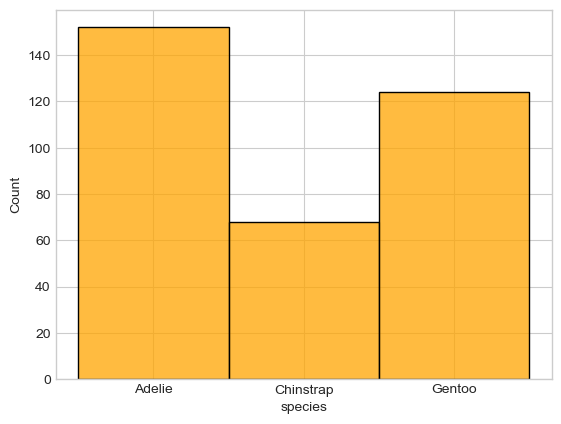

In [12]:
sns.histplot(x = "species", data = train, color="orange")
plt.show()

### We have 3 unique species values.(Adelie, Chinstrap, Gentoo)
### The most common type is Adelie.(152 times)
### The least common type is Chinstrap.(68 times)

## Island

In [13]:
train.island.describe()

count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object

In [14]:
train["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [15]:
train["island"].unique

<bound method Series.unique of 0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object>

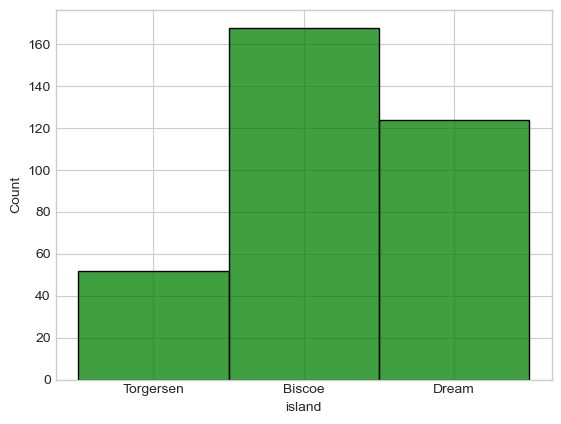

In [16]:
sns.histplot(x = "island", data = train, color="green")
plt.show()

### We have 3 unique island values in this dataset.(Biscoe, Dream, Torgersen)
### Biscoe Island is the place where penguins live most.(168)
### Torgersen Island is the place where penguins live least.(52)


## Sex

In [17]:
train.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

#### There is '.' value in sex column, lets find this value.

In [18]:
train[train["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


#### Let's assign a value to row ID 336 let's say, Female.

In [19]:
train.at[336,'sex'] = 'FEMALE'

In [20]:
train["sex"].isnull().sum()

10

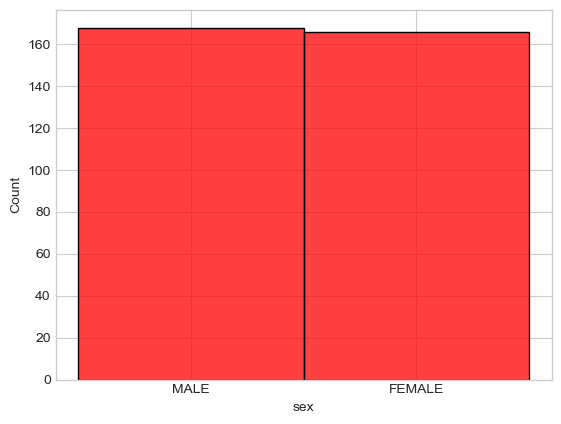

In [21]:
sns.histplot(x = "sex", data= train, color="red")
plt.show()

### The number of male penguins and female penguins are close to each other, male penguins numbers is 3 more higher then female penguins.
### Also we have 10 missing values about sex.

# Numerical Variables

In [22]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrbution with hist".format(variable))
    plt.show()

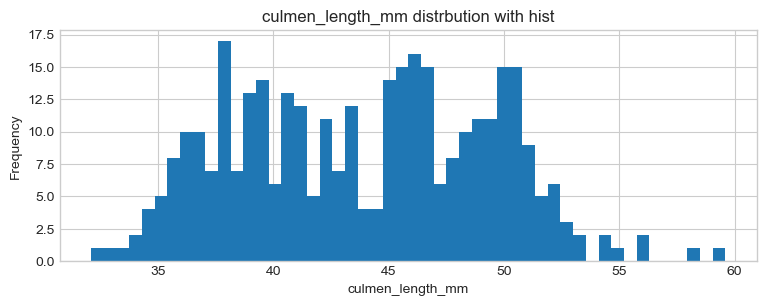

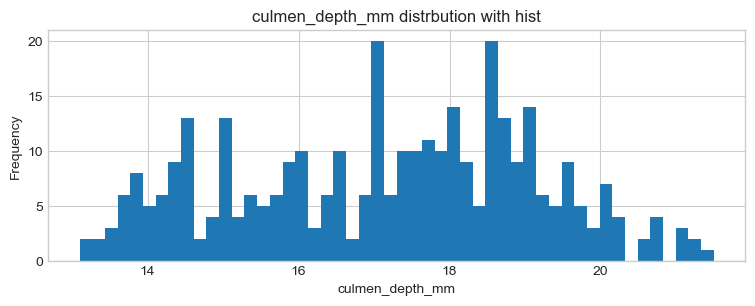

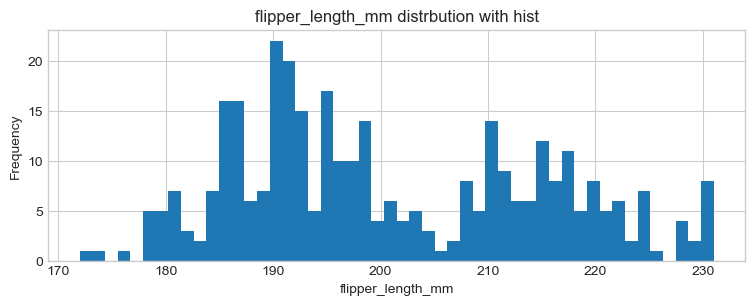

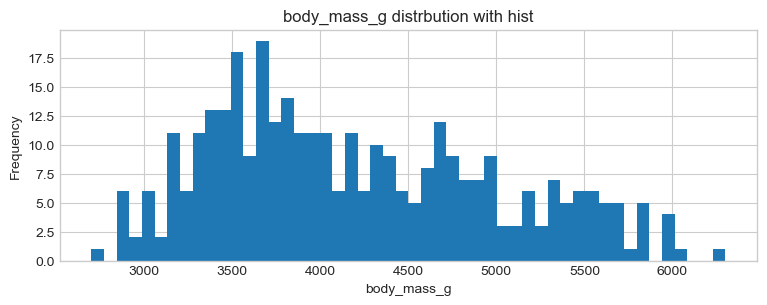

In [23]:
numeric_variables = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for c in numeric_variables:
    plot_hist(c)

# Basic Data Analysis

### species -- culmen_length_mm
### species -- culmen_depth_mm
### species -- flipper_length_mm
### species -- body_mass_g
### island -- culmen_length_mm
### island -- culmen_depth_mm
### island -- flipper_length_mm
### island -- body_mass_g


In [24]:
#species -- culmen_length_mm
train[["species","culmen_length_mm"]].groupby(["species"],as_index = False).mean().sort_values(by ="culmen_length_mm", ascending = False)

,species,culmen_length_mm
1,Chinstrap,48.833824
2,Gentoo,47.504878
0,Adelie,38.791391


In [25]:
#species -- culmen_depth_mm
train[["species","culmen_depth_mm"]].groupby(["species"],as_index = False).mean().sort_values(by ="culmen_depth_mm", ascending = False)

,species,culmen_depth_mm
1,Chinstrap,18.420588
0,Adelie,18.346358
2,Gentoo,14.982114


### Chinstraps culmen lenghts and culmen depths averages is higher than others.

In [26]:
#species -- flipper_length_mm
train[["species","flipper_length_mm"]].groupby(["species"],as_index = False).mean().sort_values(by ="flipper_length_mm", ascending = False)

,species,flipper_length_mm
2,Gentoo,217.186992
1,Chinstrap,195.823529
0,Adelie,189.953642


In [27]:
#species -- body_mass_g
train[["species","body_mass_g"]].groupby(["species"],as_index = False).mean().sort_values(by ="body_mass_g", ascending = False)

,species,body_mass_g
2,Gentoo,5076.016260
1,Chinstrap,3733.088235
0,Adelie,3700.662252


### Gentoo has the highest body mass and flipper lenght rank, Adelie has the opposite.

In [28]:
#island -- culmen_length_mm
train[["island","culmen_length_mm"]].groupby(["island"],as_index = False).mean().sort_values(by ="culmen_length_mm", ascending = False)

,island,culmen_length_mm
0,Biscoe,45.257485
1,Dream,44.167742
2,Torgersen,38.950980


In [29]:
#island -- culmen_depth_mm
train[["island","culmen_depth_mm"]].groupby(["island"],as_index = False).mean().sort_values(by ="culmen_depth_mm", ascending = False)

,island,culmen_depth_mm
2,Torgersen,18.429412
1,Dream,18.344355
0,Biscoe,15.874850


In [30]:
#island -- flipper_length_mm
train[["island","flipper_length_mm"]].groupby(["island"],as_index = False).mean().sort_values(by ="flipper_length_mm", ascending = False)

,island,flipper_length_mm
0,Biscoe,209.706587
1,Dream,193.072581
2,Torgersen,191.196078


In [31]:
#island -- body_mass_g
train[["island","body_mass_g"]].groupby(["island"],as_index = False).mean().sort_values(by ="body_mass_g", ascending = False)

,island,body_mass_g
0,Biscoe,4716.017964
1,Dream,3712.903226
2,Torgersen,3706.372549


### Penguins who live in the Biscoe island have highest culmen length, flipper length and body mass.

# Visualization

### Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g
### species--culmen_length_mm/culmen_depth_mm
### island--culmen_length_mm/culmen_depth_mm
### species--flipper_length_mm
### island--sex--flipper_length_mm
### species--body_mass_g
### island--body_mass_g
### island-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

## Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g

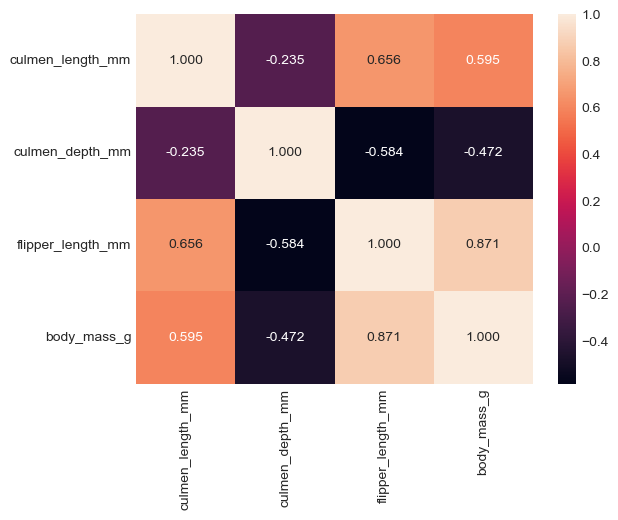

In [32]:
list1 = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.heatmap(train[list1].corr(),annot = True, fmt = ".3f")
plt.show()

### There is a big positive corelation between flipper_length_mm and body_mass_g.
### Others got moderate correlation between them.

## species--culmen_length_mm/culmen_depth_mm

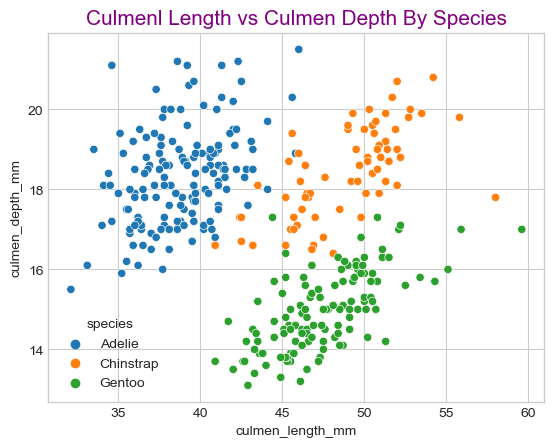

In [33]:
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = train, hue = "species")
plt.title("Culmenl Length vs Culmen Depth By Species", size=15, color="purple")
plt.show()

### Adelie penguins have longer culmen depth than other species but they have short culmen length.
### Also Gentoo penguins have longer culmen length other species but they have short culmen depth.
### Chinstrap penguins culmen depths and lengths more balanced than other species.


## island--culmen_length_mm/culmen_depth_mm

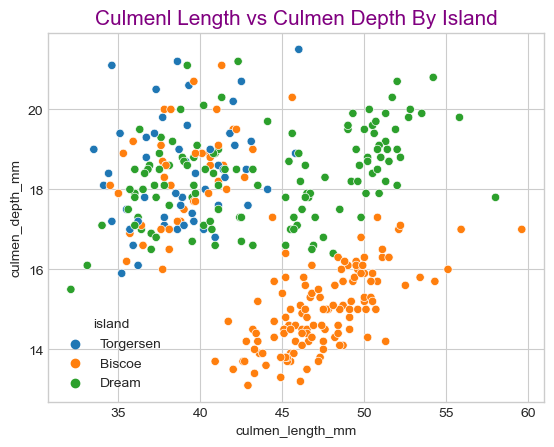

In [34]:
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = train, hue = "island")
plt.title("Culmenl Length vs Culmen Depth By Island", size=15, color="purple")
plt.show()

## species--flipper_length_mm

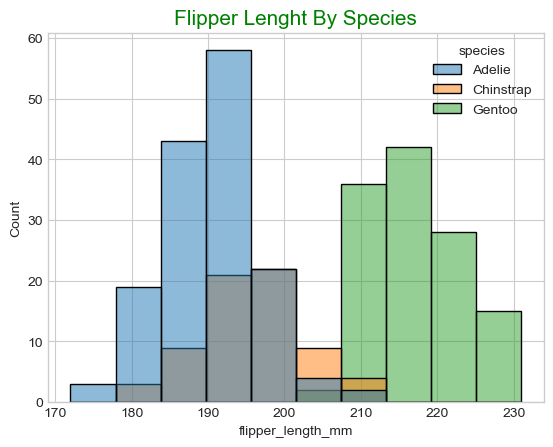

In [35]:
sns.histplot(x = "flipper_length_mm", data = train, hue = "species")
plt.title("Flipper Lenght By Species", size=15, color="green")
plt.show()

### The Gentoo species got longer flipper_length_mm.
### All species common flipper_length_mm is in 190-200.
### Only Gentoo species has 220 and 230 flipper_length_mm.

## island--sex--flipper_length_mm

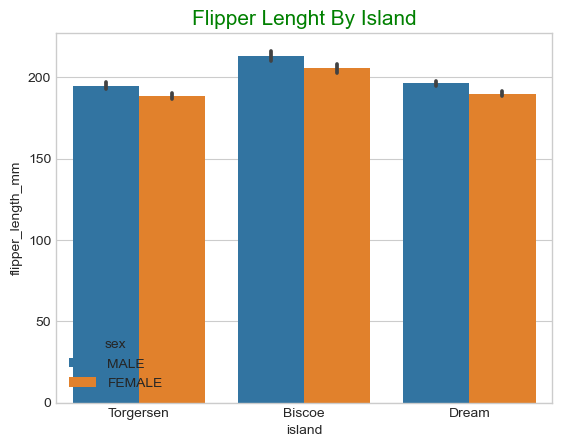

In [36]:
sns.barplot(x = "island", y = "flipper_length_mm", data = train, hue = "sex")
plt.title("Flipper Lenght By Island", size=15, color="green")
plt.show()

### Biscoe island has little bit longer flipper_length_mm than other.

## species--body_mass_g

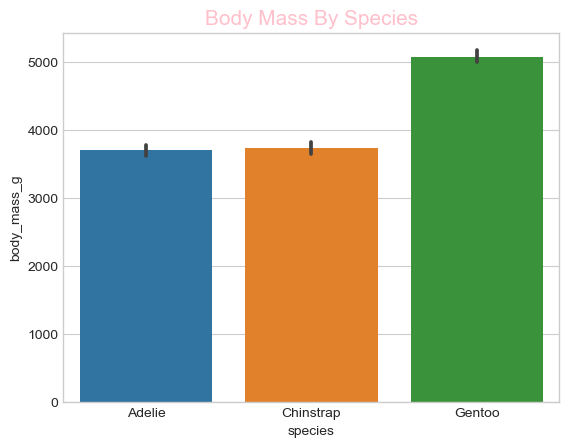

In [37]:
g = sns.barplot(x = "species", y = "body_mass_g", data = train)
plt.title("Body Mass By Species", size=15, color="pink")
plt.show()

### Gentoo has biggest body_mass_g.
### Adelie and Chinstrap are close to each other.

## island--body_mass_g

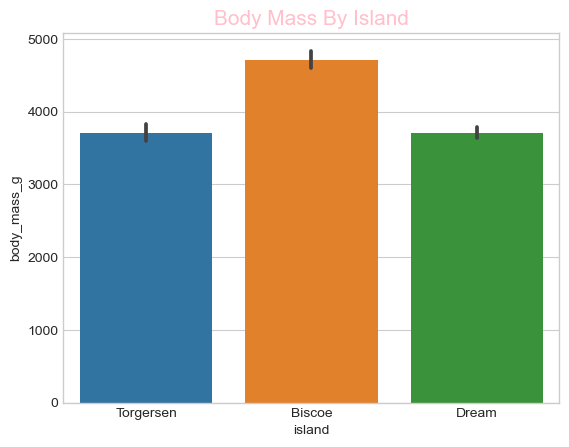

In [38]:
g = sns.barplot(x = "island", y = "body_mass_g", data = train)
plt.title("Body Mass By Island", size=15, color="pink")
plt.show()

### Biscoe has biggest body_mass_g.
### Torgersen and Dream are close to each other.

## island-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

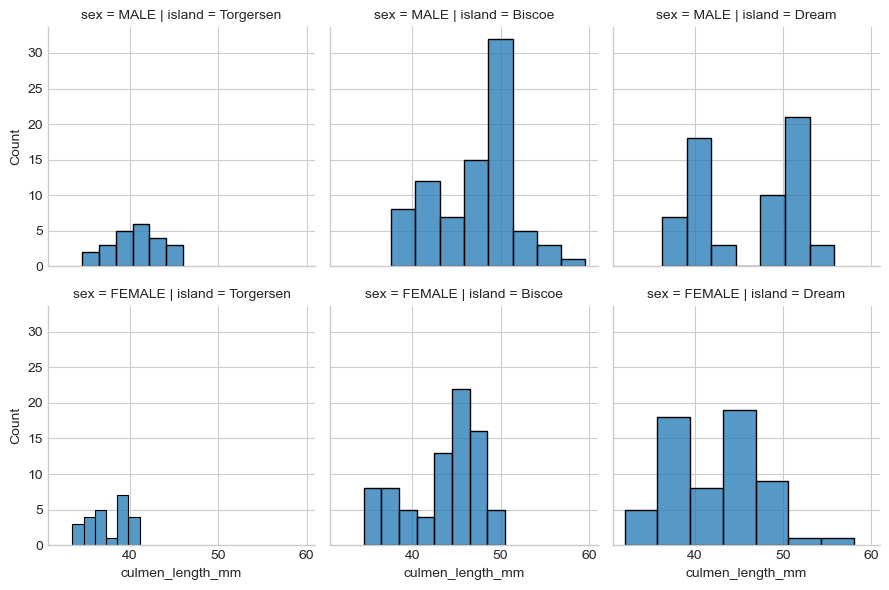

In [39]:
sns.FacetGrid(train, col="island", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

### Male culmen lengths average 51mm and 49 mm respectively while female culmen lengths average 46mm and 45 mm respectively

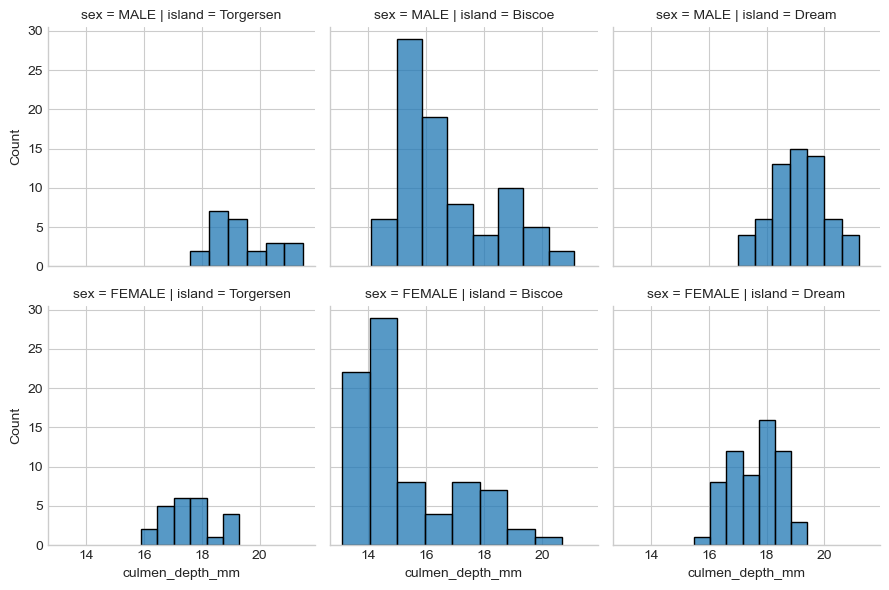

In [40]:
sns.FacetGrid(train, col="island", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

### Male culmen depths for the species average 19mm. Culmen depths for females of the species average 18 mm.

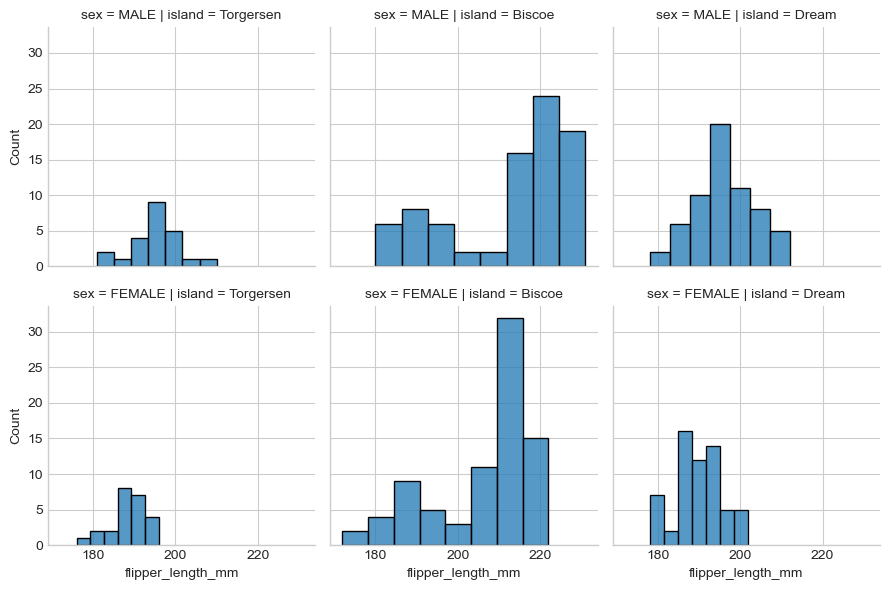

In [41]:
sns.FacetGrid(train, col="island", row="sex").map(sns.histplot, "flipper_length_mm")
plt.show()

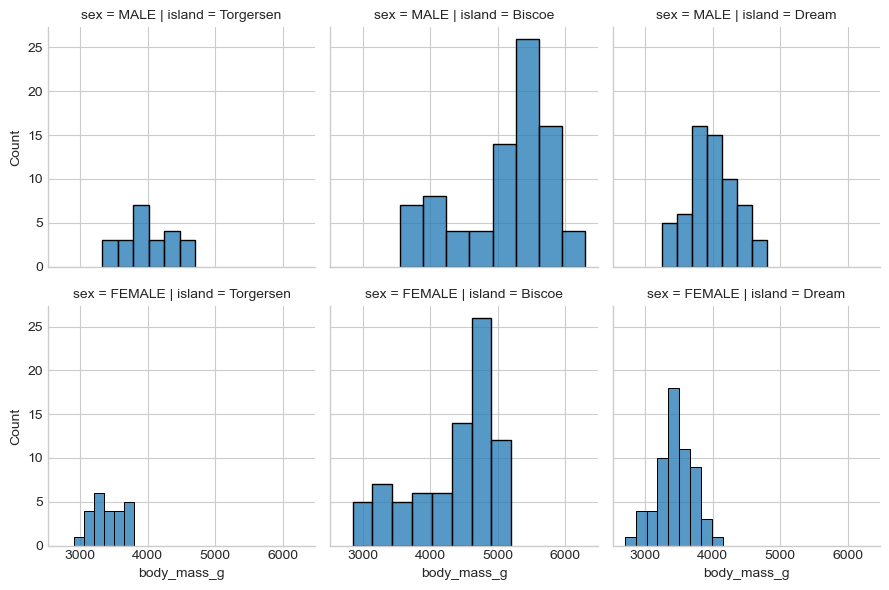

In [42]:
sns.FacetGrid(train, col="island", row="sex").map(sns.histplot, "body_mass_g")
plt.show()

## species-sex-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

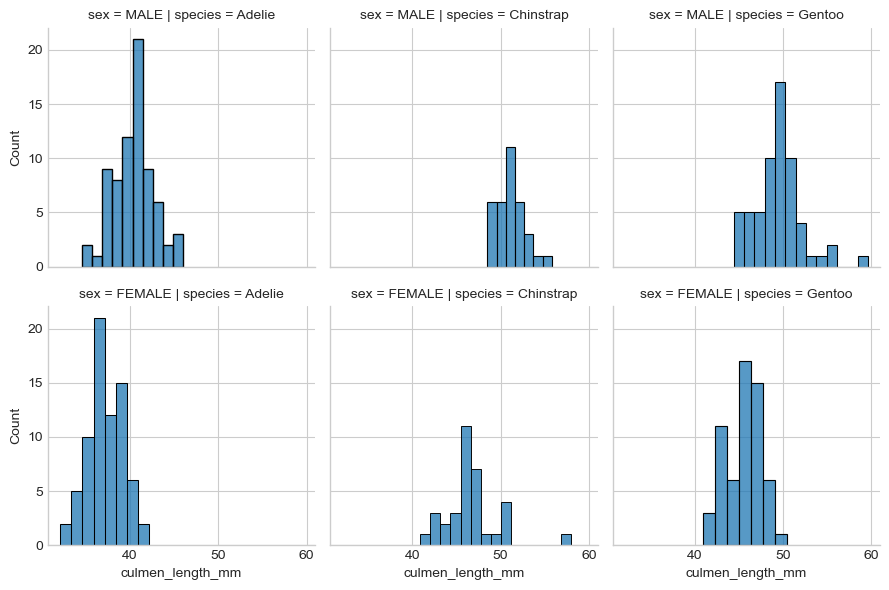

In [43]:
sns.FacetGrid(train, col="species", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

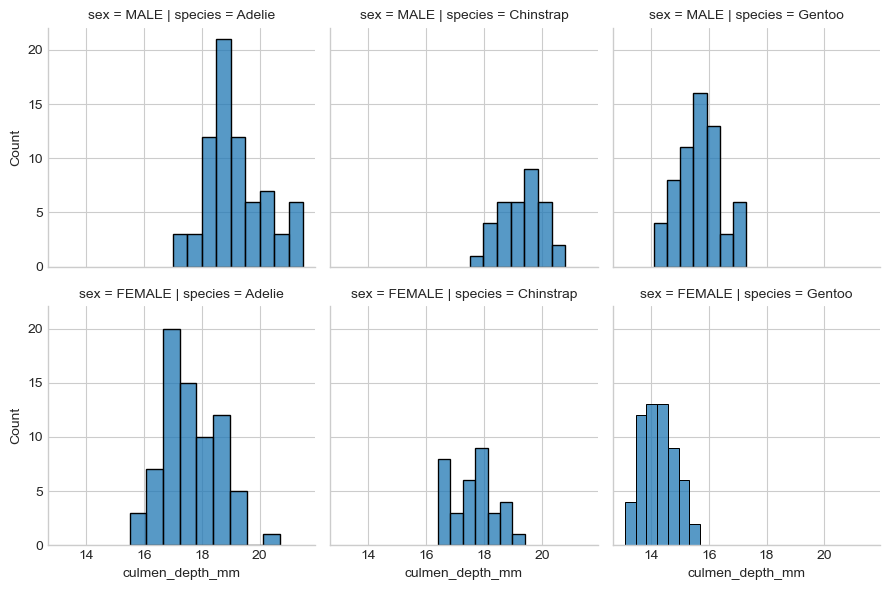

In [44]:
sns.FacetGrid(train, col="species", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

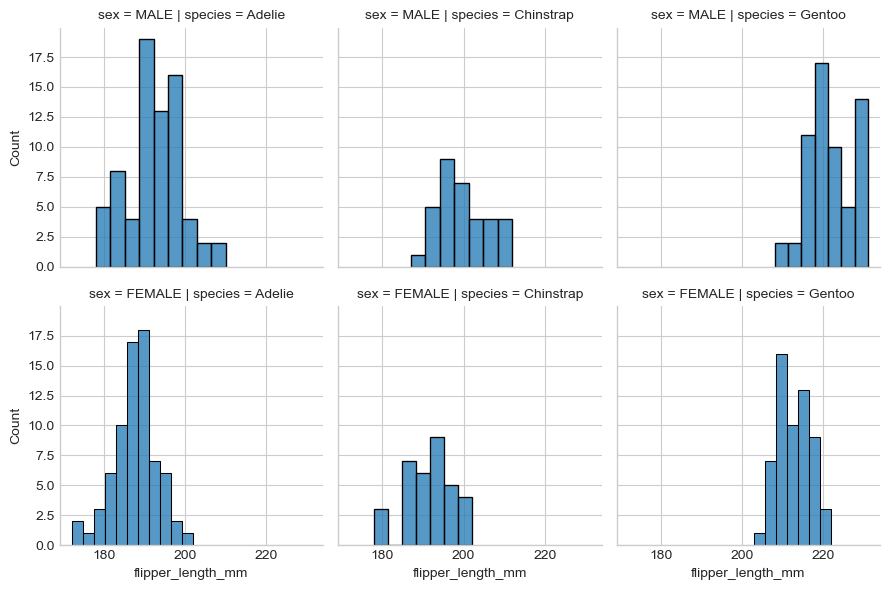

In [45]:
sns.FacetGrid(train, col="species", row="sex").map(sns.histplot, "flipper_length_mm")
plt.show()

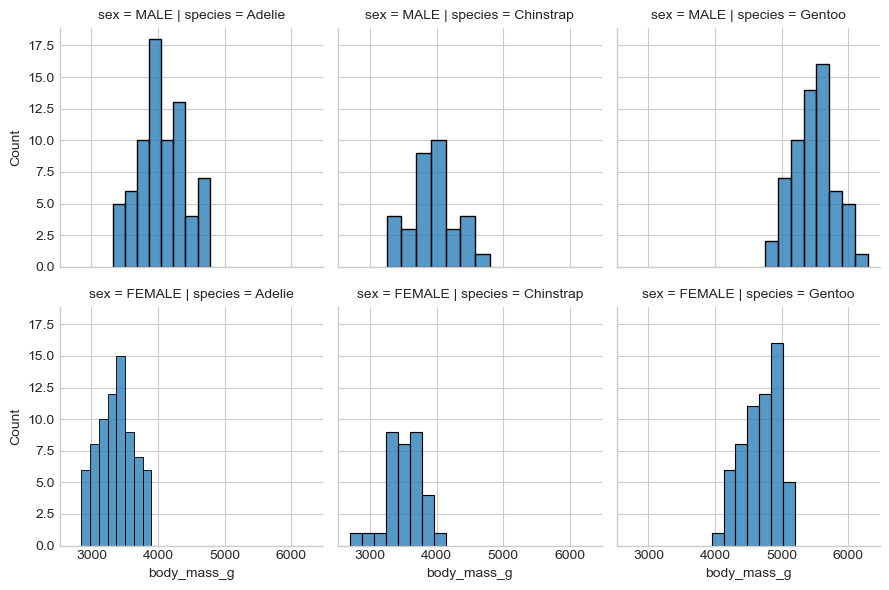

In [46]:
sns.FacetGrid(train, col="species", row="sex").map(sns.histplot, "body_mass_g")
plt.show()

In [47]:
my_report = sweetviz.analyze([train, "Train"])

/Users/swayamsahu/anaconda3/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/Users/swayamsahu/anaconda3/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |      | [  0%]   00:00 -> (? left)

/Users/swayamsahu/anaconda3/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/Users/swayamsahu/anaconda3/lib/python3.10/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/Users/swayamsahu/anaconda3/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/Users/swayamsahu/anaconda3/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).a

In [48]:
my_report.show_html("Penguins.html")

Report Penguins.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
